# Clustering using K-Means


In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
warnings.filterwarnings('ignore', category=FutureWarning)

# Read the data
points_df = pd.read_csv("datasets/points.csv")
seeds_df = pd.read_csv("datasets/Grains/seeds.csv", header=None)
print(seeds_df.shape)
seeds_df.head(10)


(42, 8)


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


### Plot the data before clustering

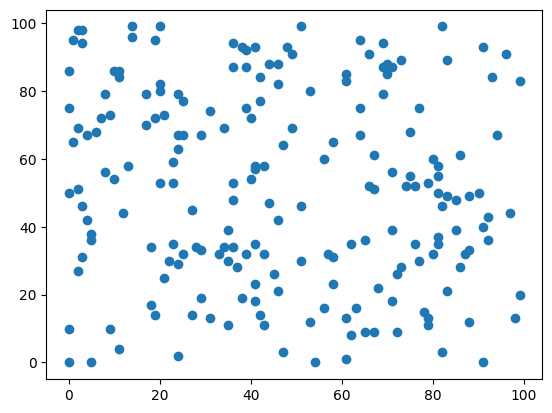

In [2]:
xs = points_df['X']
ys = points_df['Y']

plt.scatter(xs, ys)
plt.show()

### Build model

In [8]:
model = KMeans(n_clusters=4)
model.fit(seeds_df)
labels = model.predict(seeds_df)
print(labels)


[0 0 2 2 0 2 2 2 0 0 1 2 1 2 2 1 1 0 2 1 2 2 0 3 0 0 2 3 2 2 3 0 1 2 0 0 0
 0 2 1 2 2]


### Plot the data after clustering

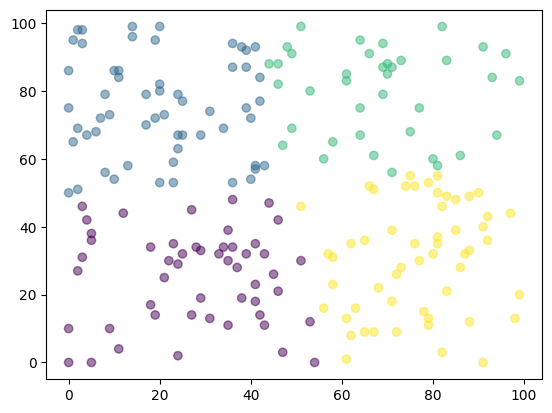

In [4]:
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.show()

### Plot the centroids

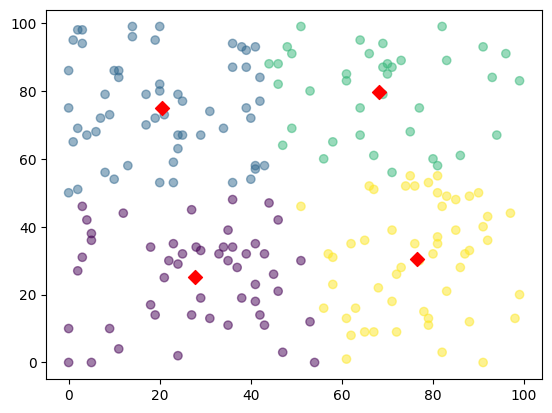

In [5]:
centroids = model.cluster_centers_
c_x = centroids[:,0]
c_y = centroids[:,1]
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.scatter(c_x, c_y, marker='D', s=50, c='r')
plt.show()

### Scaling >> Pipeline >> Cross Tabulation

In [6]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

pipeline.fit(points_df)
labels2 = pipeline.predict(points_df)
ct = pd.crosstab(labels2, labels)
print(ct)


col_0   0   1   2   3
row_0                
0       0   0  38   0
1       3   0   0  54
2       0  57   0   0
3      48   0   0   0


## Evalute a clustering using `inertia` <br>
(Sum of distances between points and centroid of a cluster)<br><br>
**Best K is the K at which there is an elbow in the plot**<br><br>
Best k in this example is 3

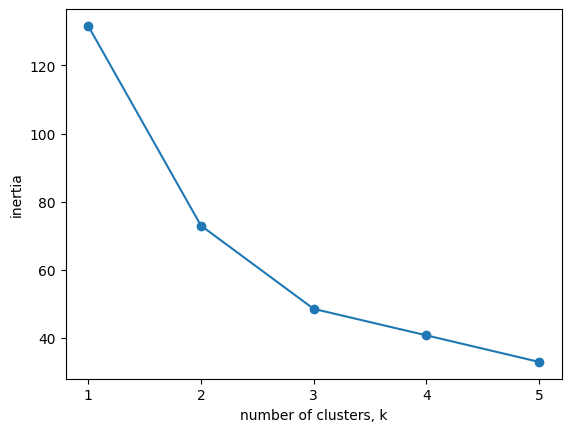

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(seeds_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias,"-o")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
